# Wavelet Denoising

This numerical tour uses wavelets to perform non-linear
image denoising.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$


*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.

In [1]:
using PyPlot
using NtToolBox
using Autoreload
arequire("NtToolBox")

  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:1
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:1
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:7
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:7
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:12
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  like

## Image Denoising

We consider a simple generative model of noisy images $F = f_0+W$
where $f_0 \in \RR^N$ is a deterministic image of $N$ pixels, and
$W$ is a Gaussian white noise distributed according to $\Nn(0,\si^2
\text{Id}_N)$, where $\si^2$ is the variance of noise.

The goal of denoising is to define an estimator $\tilde F$ of
$f_0$ that depends only on $F$, i.e. $\tilde F = \phi(F)$
where $\phi : \RR^N \rightarrow \RR^N$ is a potentially non-linear
mapping.

Note that while $f_0$ is a deterministic image, both $F$ and $\tilde F$
are random variables (hence the capital letters). 

The goal of denoising is to reduce as much as possible the denoising
error given some prior knowledge on the (unknown) image $f_0$.
A mathematical way to measure this error is to bound the 
quadratic risk $\EE_w(\norm{\tilde F - f_0}^2)$, where the expectation is computed
with respect to the distribution of the noise $W$.

Image loading and adding Gaussian Noise
For real life applications, one does not have access to the underlying
image $f_0$. In this tour, we however assume that $f_0$ is known, and
$f = f_0 + w\in \RR^N$ is generated using a single realization of the noise $w$
that is drawn from $W$. We define the estimated deterministic image as 
$\tilde f = \phi(f)$ which is a realization of the random vector
$\tilde F$.


First we load an image $f_0 \in \RR^N$ where $N=n \times n$ is the number of pixels, and then display it.

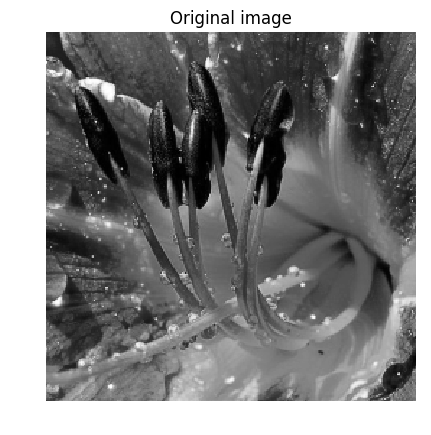

  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31


PyObject <matplotlib.text.Text object at 0x000000001D838BE0>

  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31


In [2]:
n = 256
name = "NtToolBox/src/data/flowers.png"
f0 = load_image(name, n)
imageplot(f0, "Original image")

Standard deviation $\si$ of the noise.

In [3]:
sigma = .08

0.08

Then we add Gaussian noise $w$ to obtain $f=f_0+w$.

In [11]:
using Distributions
f = f0 + sigma.*rand(Normal(), size(f0)[1], size(f0)[2])


256×256 Array{Float64,2}:
 0.00946098  0.171276  -0.0971532  0.149744   …  0.120975  0.154294  0.21628 
 0.302961    0.220311   0.0674201  0.134897      0.374651  0.524434  0.37733 
 0.243929    0.265053   0.108189   0.0612388     0.474576  0.318547  0.563671
 0.206223    0.141249   0.208927   0.173025      0.289476  0.409332  0.372946
 0.184652    0.168767   0.0937738  0.0201933     0.459592  0.464803  0.222049
 0.355584    0.165124   0.287202   0.210512   …  0.376762  0.416069  0.396084
 0.208167    0.143726   0.234504   0.0777602     0.483621  0.550987  0.390189
 0.203764    0.299182   0.158326   0.260042      0.335249  0.50233   0.38463 
 0.189172    0.259012   0.218076   0.117172      0.491946  0.401684  0.179752
 0.23963     0.237963   0.274913   0.400454      0.351231  0.254856  0.341466
 0.122932    0.098934   0.185749   0.194355   …  0.199736  0.36114   0.232096
 0.258494    0.026117   0.155391   0.11278       0.387757  0.250459  0.324009
 0.189685    0.138186   0.0639604  0.0

Display the noisy image. 

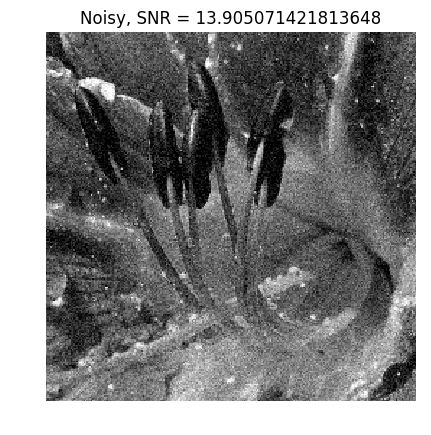

PyObject <matplotlib.text.Text object at 0x000000001E9E0BE0>

In [16]:
imageplot(clamP(f), string("Noisy, SNR = ", string(snr(f0,f)) ))

## Hard Thresholding in Wavelet Bases

A simple but efficient non-linear denoising estimator is obtained by
thresholding the coefficients of $f$ in a well chosen orthogonal basis
$\Bb = \{\psi_m\}_m$ of $\RR^N$.

In the following, we will focuss on a wavelet basis, which is efficient
to denoise piecewise regular images.

The hard thresholding operator with threshold $T \geq 0$ applied to
some image $f$ is defined as
$$ S_T^0(f) = \sum_{\abs{\dotp{f}{\psi_m}}>T} \dotp{f}{\psi_m} \psi_m
       = \sum_m s_T^0(\dotp{f}{\psi_m}) \psi_m $$
where the hard thresholding operator is
$$
      s_T^0(\alpha) = \choice{
           \alpha \qifq \abs{\al}>T, \\
              0 \quad\text{otherwise}.
      }$
$$


The denoising estimator is then defined as
$$ \tilde f = S_T^0(f). $$

Display the function $s_T^0(\al)$ for $T=1$.

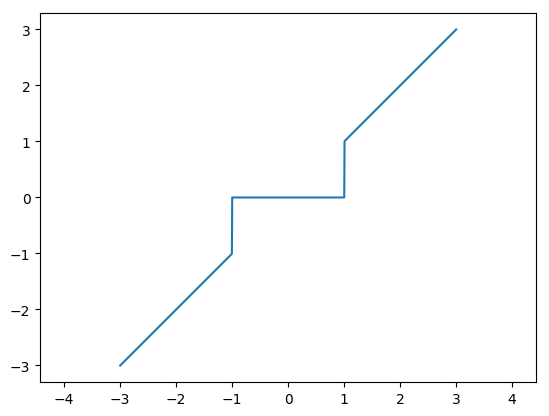

(-3.3,3.3,-3.3,3.3)

In [18]:
# def thresh_hard(u,t):return u*(abs(u)>t)
thresh_hard = (u, t) -> u.*(abs(u) .> t)
alpha = linspace(-3, 3, 1000)
plot(alpha, thresh_hard(alpha, 1))
axis("equal")

Parameters for the orthogonal wavelet transform.

In [19]:
h = [0, .482962913145, .836516303738, .224143868042, -.129409522551]
h = h./norm(h)
Jmin = 2

2

First we compute the wavelet coefficients $a$  
of the noisy image $f$.

In [20]:
a = perform_wavortho_transf(f, Jmin, +1, h)

256×256 Array{Float64,2}:
 23.2029     23.7994     18.6895      …  -0.010779    -0.0208413 
 13.7323     11.7247     18.0669         -0.0072247   -0.0514273 
 22.2244     24.9596     25.2654          0.168115    -0.0418802 
 22.3522     29.7795     31.8379          0.177851    -0.0557001 
  3.17916     6.28307     7.38689         0.0929588    0.0529098 
  3.06924    -1.25511    -4.02018     …   0.197981    -0.0800786 
 -1.14978    -2.94584     3.73957         0.152554    -0.0395722 
 -0.235811   -3.1608     -1.5982         -0.129291     0.0746185 
  2.97864     0.978535    1.19934        -0.0483586    0.00964345
  0.0575112  -1.92491     0.149061        0.0792409   -0.0956044 
 -2.16625    -1.57304     2.79983     …  -0.152794    -0.116179  
  0.848897   -0.619303   -1.60032        -0.0728786    0.335675  
  0.717221   -1.16485     1.3597          0.00515828   0.0314177 
  ⋮                                   ⋱                ⋮         
  0.0268356   0.215144    0.102231       -0.012665

Display the noisy coefficients.

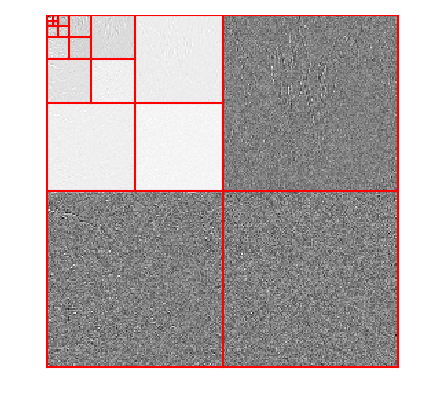

In [21]:
plot_wavelet(a, Jmin);

Select the threshold value, that should be proportional to the noise
level $\si$.

In [22]:
T = 3*sigma

0.24

Hard threshold the coefficients below the noise level to obtain $a_T(m)=s_T^0(a_m)$.

In [23]:
aT = thresh_hard(a, T)

256×256 Array{Float64,2}:
 23.2029    23.7994    18.6895   …  -0.0       -0.0  -0.0  -0.0     
 13.7323    11.7247    18.0669      -0.0        0.0  -0.0  -0.0     
 22.2244    24.9596    25.2654       0.0        0.0   0.0  -0.0     
 22.3522    29.7795    31.8379      -0.0        0.0   0.0  -0.0     
  3.17916    6.28307    7.38689     -0.0       -0.0   0.0   0.0     
  3.06924   -1.25511   -4.02018  …   0.0       -0.0   0.0  -0.0     
 -1.14978   -2.94584    3.73957     -0.0       -0.0   0.0  -0.0     
 -0.0       -3.1608    -1.5982      -0.0       -0.0  -0.0   0.0     
  2.97864    0.978535   1.19934     -0.0       -0.0  -0.0   0.0     
  0.0       -1.92491    0.0          0.292194  -0.0   0.0  -0.0     
 -2.16625   -1.57304    2.79983  …  -0.0        0.0  -0.0  -0.0     
  0.848897  -0.619303  -1.60032      0.0       -0.0  -0.0   0.335675
  0.717221  -1.16485    1.3597       0.0       -0.0   0.0   0.0     
  ⋮                              ⋱                          ⋮       
  0.0   

Display the thresholded coefficients.

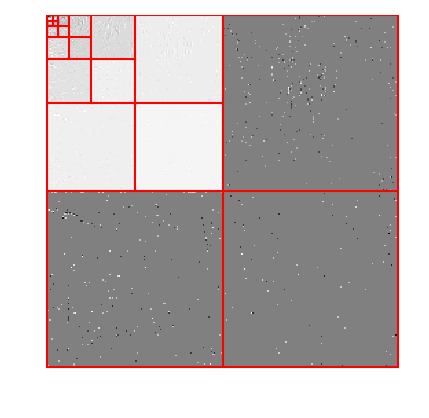

In [24]:
plot_wavelet(aT, Jmin);

Reconstruct the image $\tilde f$ from these noisy coefficients.

In [25]:
fHard = perform_wavortho_transf(aT, Jmin, -1, h)

256×256 Array{Float64,2}:
 0.171097  0.161741  0.159558  0.130605  …  0.228856  0.267356  0.225225
 0.174428  0.166177  0.166054  0.135595     0.393005  0.58471   0.410028
 0.17746   0.170662  0.174316  0.138963     0.46957   0.452893  0.335429
 0.181607  0.174962  0.17599   0.148384     0.449849  0.418179  0.317164
 0.186869  0.179077  0.175847  0.155592     0.425664  0.372349  0.29275 
 0.187969  0.183883  0.182483  0.171059  …  0.418142  0.368005  0.291281
 0.187382  0.186251  0.186243  0.182044     0.411935  0.364067  0.289216
 0.193092  0.197717  0.200734  0.209754     0.400823  0.358617  0.289373
 0.205098  0.218281  0.225954  0.254189     0.384806  0.351655  0.291752
 0.193605  0.204891  0.211129  0.236205     0.387094  0.350336  0.28584 
 0.179103  0.190168  0.196315  0.220817  …  0.376067  0.338494  0.272839
 0.175834  0.180421  0.18146   0.195742     0.414729  0.365924  0.286292
 0.1838    0.175651  0.166564  0.16098      0.520471  0.432625  0.326199
 ⋮                       

Display the denoising result.

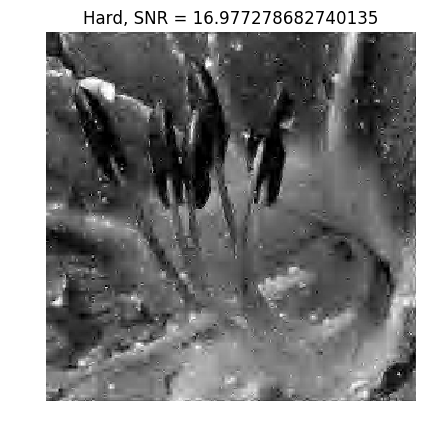

PyObject <matplotlib.text.Text object at 0x0000000026FDC588>

In [26]:
imageplot(clamP(fHard), string("Hard, SNR = ", string(snr(f0, fHard))) )

## Wavelet Denoising with Soft Thesholding

The estimated image $\tilde f$ using hard thresholding.
suffers from many artifacts. It is
possible to improve the result by using soft thresholding, 
defined as
$$ \tilde f = S_T^1(f) = \sum_m s_T^1(\dotp{f}{\psi_m}) \psi_m $$
$$
      \qwhereq
      s_T^1(\alpha) = \max\pa{0, 1 - \frac{T}{\abs{\alpha}}}\alpha.
$$

Display the soft thresholding function $s_T^1(\al)$.

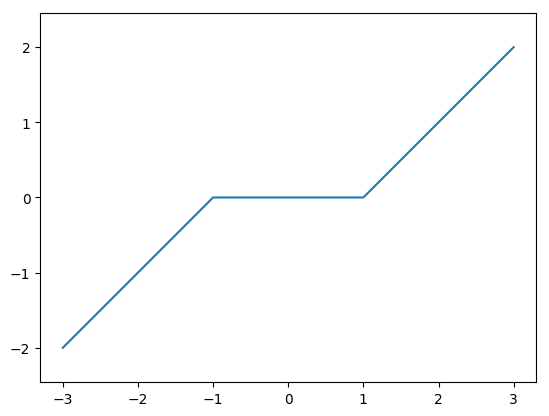

In [27]:
# def thresh_soft(u,t):return maximum(1-t/abs(u), 0)*u
thresh_soft = (u, t) -> max(1 - t./abs(u), 0).*u
alpha = linspace(-3, 3, 1000)
plot(alpha, thresh_soft(alpha, 1))
axis("equal");

Select the threshold.

In [28]:
T = 3/2*sigma

0.12

Perform the soft thresholding.

In [29]:
aT = thresh_soft(a, T)

256×256 Array{Float64,2}:
 23.0829      23.6794     18.5695      …  -0.0         -0.0       
 13.6123      11.6047     17.9469         -0.0         -0.0       
 22.1044      24.8396     25.1454          0.048115    -0.0       
 22.2322      29.6595     31.7179          0.0578505   -0.0       
  3.05916      6.16307     7.26689         0.0          0.0       
  2.94924     -1.13511    -3.90018     …   0.0779813   -0.0       
 -1.02978     -2.82584     3.61957         0.0325542   -0.0       
 -0.115811    -3.0408     -1.4782         -0.00929077   0.0       
  2.85864      0.858535    1.07934        -0.0          0.0       
  0.0         -1.80491     0.0290605       0.0         -0.0       
 -2.04625     -1.45304     2.67983     …  -0.0327945   -0.0       
  0.728897    -0.499303   -1.48032        -0.0          0.215675  
  0.597221    -1.04485     1.2397          0.0          0.0       
  ⋮                                    ⋱                ⋮         
  0.0          0.0951435   0.0      

To slightly improve the soft thresholding performance, we do not
threshold the coefficients corresponding to coarse scale wavelets. 

In [30]:
aT[1:2^Jmin, 1:2^Jmin] = a[1:2^Jmin, 1:2^Jmin]

4×4 Array{Float64,2}:
 23.2029  23.7994  18.6895  21.0164
 13.7323  11.7247  18.0669  21.5328
 22.2244  24.9596  25.2654  22.059 
 22.3522  29.7795  31.8379  31.1477

Re-construct the soft thresholding estimator $\tilde f$.

In [88]:
# fSoft = perform_wavortho_transf(aT, Jmin, -1, h)


256×256 Array{Float64,2}:
 0.403459  0.426219  0.441822   0.484134  …  0.430635  0.433223  0.424164
 0.426673  0.415576  0.405245   0.392054     0.408755  0.40848   0.414452
 0.590437  0.530837  0.504321   0.354335     0.508772  0.491445  0.524064
 0.229664  0.176219  0.0971344  0.11374      0.153863  0.172437  0.188356
 0.458649  0.401779  0.362971   0.256759     0.345001  0.342275  0.382663
 0.449584  0.393538  0.351072   0.257924  …  0.347583  0.345202  0.380649
 0.424729  0.370468  0.32376    0.248866     0.336558  0.339199  0.366954
 0.458802  0.402738  0.353974   0.277963     0.376314  0.366523  0.396852
 0.518931  0.458001  0.404303   0.323616     0.43588   0.399418  0.440504
 0.481821  0.427451  0.379564   0.307483     0.421513  0.411524  0.432824
 0.45125   0.401909  0.358508   0.292939  …  0.407877  0.417291  0.424011
 0.396277  0.357677  0.323705   0.272465     0.39151   0.446718  0.419428
 0.316901  0.294756  0.275154   0.246062     0.372414  0.499805  0.419075
 ⋮          

Display the soft thresholding denoising result.

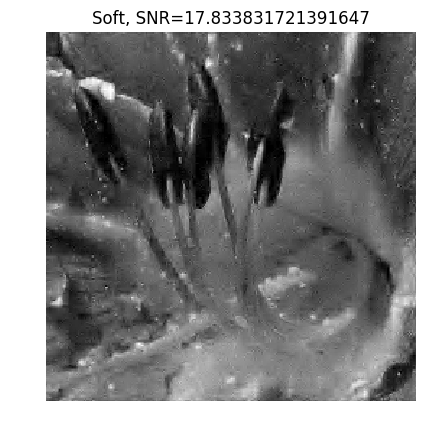

PyObject <matplotlib.text.Text object at 0x000000001F135128>

In [32]:
imageplot(clamP(fSoft), string("Soft, SNR=", string(snr(f0, fSoft))) )

One can prove that if the non-linear approximation error 
$ \norm{f_0-S_T(f_0)}^2 $ decays fast toward zero when 
$T$ decreases, then the quadratic risk 
$ \EE_w( \norm{f-S_T(f)}^2 ) $ also decays fast to zero 
when $\si$ decays. For this result to hold, it is required
to select the threshold value according to the universal threshold rule
$$ T = \si \sqrt{2\log(N)}. $$

Determine the best threshold $T$ for both hard and soft thresholding.
Test several \(T\) values in $[.8\sigma, 4.5\sigma[$, 
and display the empirical SNR $-10\log_{10}(\norm{f_0-\tilde f}/\norm{f_0})$
What can you conclude from these results ? Test with another image.

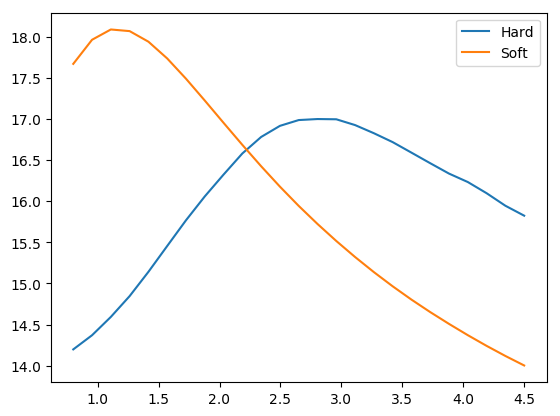

PyObject <matplotlib.legend.Legend object at 0x0000000027659978>

In [47]:
# run -i nt_solutions/denoisingwav_2_wavelet_2d/exo1
include("Exos\\denoisingwav_2_wavelet_2d\\exo1.jl")


## Translation Invariant Denoising with Cycle Spinning

Orthogonal wavelet transforms are not translation invariant.
It means that the processing of an image and of a translated version of
the image give different results.

Any denoiser can be turned into a translation invariant denoiser by
performing a cycle spinning. The denoiser is applied to several shifted
copies of the image, then the resulting denoised image are shifted back
to the original position, and the results are averaged.

This corresponds to defining the estimator as
$$ \tilde f = \frac{1}{M} \sum_{i=1}^{M}$
      T_{-\de_i} \circ S_T(f) \circ T_{\de_i}$$
where $S_T$ is either the hard or soft thresholding, 
and $T_\de(f)(x) = f(x-\de)$ is the translation operator, 
using periodic boundary conditions. 
Here $(\de_i)_i$ is a set of $M$ discrete translation. Perfect invariance
is obtained by using all possible $N$ translatation, but 
usually a small number $M \ll N$ of translation is used to obtain approximate
invariance.

Number $m$ of translations along each direction
so that $M = m^2$. 

In [48]:
m = 4

4

Generate a set of shifts $(\de_i)_i$.

In [65]:
include("ndgrid.jl")
(dY, dX) = meshgrid(0:m-1, 0:m-1)
delta = cat(2, reshape(dX, m*m, 1), reshape(dY, m*m, 1))
# reshape(dX, (m*m, 1))


16×2 Array{Int64,2}:
 0  0
 1  0
 2  0
 3  0
 0  1
 1  1
 2  1
 3  1
 0  2
 1  2
 2  2
 3  2
 0  3
 1  3
 2  3
 3  3

, 1}) in module Main at C:\Users\Ayman\.julia\v0.5\ndgrid.jl:3 overwritten at C:\Users\Ayman\.julia\v0.5\ndgrid.jl:3.


To avoid storing all the translates in memory, one can perform a
progressive averaging of the translates by defining $f^{(0)}=0$ and
then
$$ \forall\, i=1,\ldots,M, \quad f^{(i)} = \pa{1-\frac{i}{n}} f^{(i-1)} + 
      \frac{i}{n} T_{-\de_i} \circ S_T(f) \circ T_{\de_i}  $$
One then has $\tilde f = f^{(M)} $ after $M$ steps.

Initialize the denoised image $f^{(0)}=0$.

In [105]:
fTI = zeros(n, n)
T = 3*sigma
index = 1
for i in 1:m*m
    fS = circshift(f, delta[i, :])
    a = perform_wavortho_transf(fS, Jmin, 1, h)
    aT = thresh_hard(a, T)
    fS = perform_wavortho_transf(aT, Jmin, -1, h)
    fS = circshift(fS, -delta[i, :])
    fTI = i/(i + 1.0).*fTI + 1.0/(i + 1).*fS
    index += 1
end
# fS = circshift(f, delta[1, :])
# a = perform_wavortho_transf(fS, Jmin, 1, h)
# aT = thresh_hard(a, T)
# fS = perform_wavortho_transf(aT, Jmin, -1, h)
# fS = circshift(fS, -delta[1, :])
# fTI = 1/(1 + 1.0).*fTI + 1.0/(1 + 1).*fS

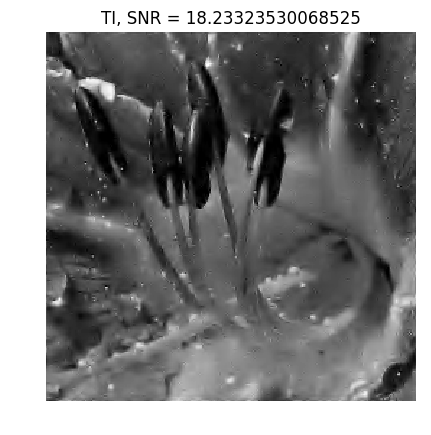

PyObject <matplotlib.text.Text object at 0x000000002772AA20>

In [106]:
imageplot(clamP(fTI), string("TI, SNR = ", string(snr(f0,fTI))) )

# Exercises

*Exercise 1:* Study the influence of the number $m$ of shift on the denoising
quality.

*Exercise 2:* Select the best threshold $T$ for the translation invariant denoising.

*Exercise 3:* Implement a block-thresholding method, that threshold coefficient in square blocks according to the energy of each of these blocks.